# Project Explanation
In this project, the problem involves a car manufacturer that wants to target users interested in buying a new SUV. The dataset consists of user information from a social network. The goal is to predict whether a user will purchase the SUV or not based on their Estimated Salary and Age using  K-Nearest Neighbour Algorithm.


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [3]:
df = pd.read_csv('dataknn.csv')

# Reading the Data

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Data Validation

<Axes: >

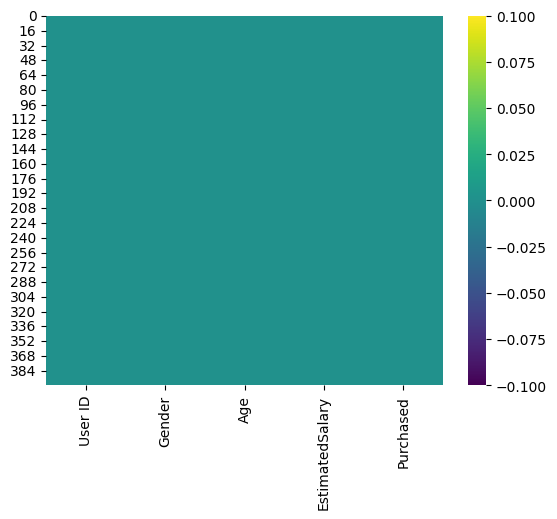

In [9]:
sns.heatmap(df.isnull(),cmap = 'viridis')

Since the data is not null we can proceed with EDA

# EDA

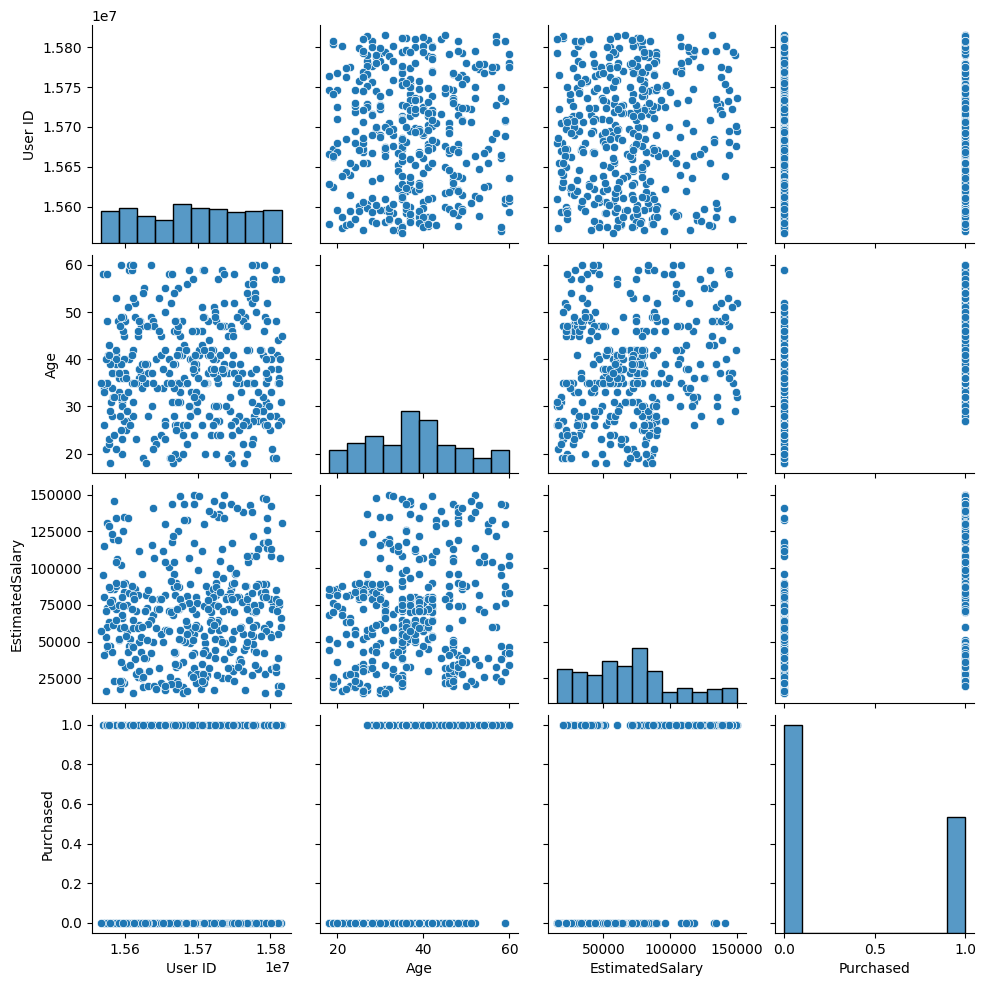

In [11]:
sns.pairplot(df)

# Data Preprocessing

In [13]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [14]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)

# Scaling the data

In [17]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
x_train= ss.fit_transform(x_train)
x_test= ss.transform(x_test)

# Model Training

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lets do a loop to find the best number of neighbours to consider

l = []

for i in range(5,41):

    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(x_test,y_test)
    y_pred = knn.predict(x_test)
    l.append(accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'Number of Neighbours VS Accuracy Score')

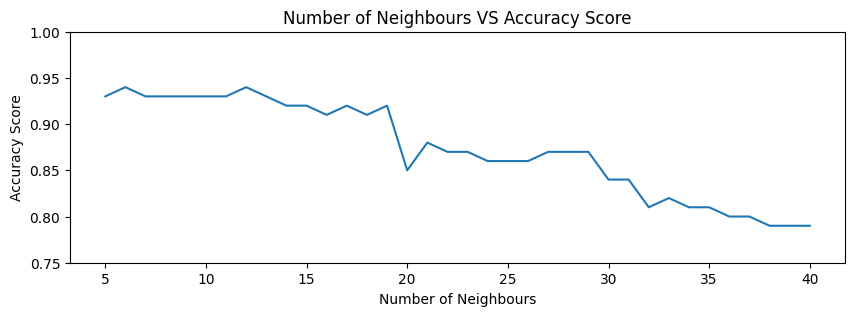

In [29]:
plt.figure(figsize=(10,3))
plt.plot(range(5,41),l)
plt.ylim(0.75,1)
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy Score")
plt.title("Number of Neighbours VS Accuracy Score")

As per the above plot it is best to take number of neighbours at 6 or 12.

In [30]:
knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
knn.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=6)

# Model Prediction

In [32]:
y_pred = knn.predict(x_test)

# Model Evalutaion

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("ACC :", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

ACC : 0.94
[[66  2]
 [ 4 28]]


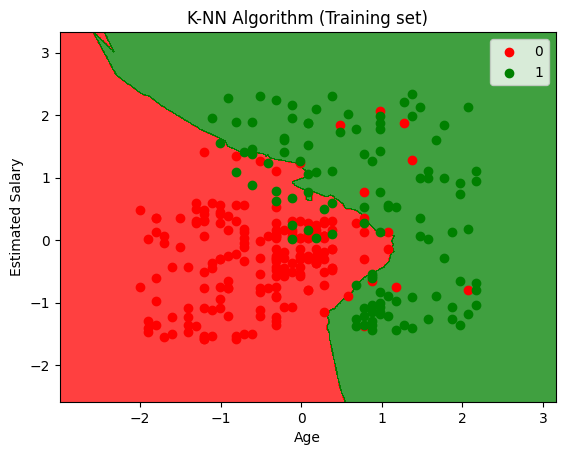

In [35]:
#Visulaizing the training set result

from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))

plt.xlim(x1.min(), x1.max())

plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):

    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)

plt.title('K-NN Algorithm (Training set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

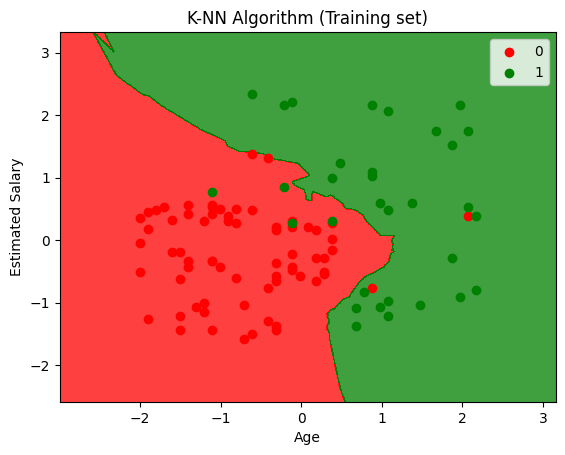

In [36]:
#Visulaizing the testing set result

from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))

plt.xlim(x1.min(), x1.max())

plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):

    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)

plt.title('K-NN Algorithm (Training set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

So, the accuracy of the K-NN model is 94%. This implies that the model correctly predicted the class of every 47 instances out of every 50 instances in the test set, which indicates a good performance on this dataset.